
# Sobre o Conjunto de Dados

### Visão geral do Conjunto de Dados:
O Conjunto de Dados de Saúde e Estilo de Vida do Sono é composto por 400 linhas e 13 colunas, abrangendo uma ampla gama de variáveis relacionadas ao sono e hábitos diários. Ele inclui detalhes como gênero, idade, ocupação, duração do sono, qualidade do sono, nível de atividade física, níveis de estresse, categoria de IMC (Índice de Massa Corporal), pressão arterial, frequência cardíaca, passos diários e a presença ou ausência de distúrbios do sono.

### Recursos principais do Conjunto de Dados:
* Métricas abrangentes do sono: Explore a duração, qualidade e fatores que influenciam os padrões de sono.
* Fatores de estilo de vida: Analise os níveis de atividade física, níveis de estresse e categorias de IMC.
* Saúde cardiovascular: Examine as medições da pressão arterial e frequência cardíaca.
* Análise de distúrbios do sono: Identifique a ocorrência de distúrbios do sono, como insônia e apneia do sono.

### Colunas do Conjunto de Dados:
* __ID da pessoa:__ Um identificador para cada indivíduo.
* __Gênero:__ O gênero da pessoa (Masculino/Feminino).
* __Idade:__ A idade da pessoa em anos.
* __Ocupação:__ A ocupação ou profissão da pessoa.
* __Duração do sono (horas):__ O número de horas que a pessoa dorme por dia.
* __Qualidade do sono (escala: 1-10) :__ Uma avaliação subjetiva da qualidade do sono, variando de 1 a 10.
* __Nível de atividade física (minutos/dia):__ O número de minutos que a pessoa se dedica à atividade física diariamente.
* __Nível de estresse (escala: 1-10):__ Uma avaliação subjetiva do nível de estresse experimentado pela pessoa, variando de 1 a 10.
* __Categoria de IMC:__ A categoria de IMC da pessoa (por exemplo, Abaixo do peso, Normal, Acima do peso).
* __Pressão arterial (sistólica/diastólica):__ A medição da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica.
* __Frequência cardíaca (bpm):__ A frequência cardíaca em repouso da pessoa em batimentos por minuto.
* __Passos diários:__ O número de passos que a pessoa dá por dia.
* __Distúrbio do sono:__ A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do sono).

### Detalhes sobre a coluna Distúrbio do Sono:

* __Nenhum:__ O indivíduo não apresenta nenhum distúrbio do sono específico.
* __Insônia:__ O indivíduo tem dificuldade para dormir ou permanecer dormindo, resultando em sono / * * inadequado ou de má qualidade.
* __Apneia do sono:__ O indivíduo sofre pausas na respiração durante o sono, resultando em padrões de sono interrompidos e riscos potenciais para a saúde.

# Analise de dados

In [2]:
import numpy   as np
import warnings
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
warnings.filterwarnings(action='ignore',category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [4]:
data = pd.read_csv(r'dataset/SleepHealthAndLifestyleDataset.csv',sep=',')

In [5]:
data.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


### Função para plotar uma tabela

Tradução das colunas para melhor visualização e compreensão

In [6]:
colunas = ['ID da pessoa','Gênero','Idade' , 'Ocupação', 'Duração do sono (horas)','Qualidade do sono (escala: 1-10)','Nível de atividade física (minutos/dia)','Nível de estresse (escala: 1-10)','Categoria de IMC','Pressão arterial (sistólica/diastólica)','Frequência cardíaca (bpm)','Passos diários','Distúrbio do sono' ]
data.columns = colunas

In [7]:
data.head(3)

,ID da pessoa,Gênero,Idade,Ocupação,Duração do sono (horas),Qualidade do sono (escala: 1-10),Nível de atividade física (minutos/dia),Nível de estresse (escala: 1-10),Categoria de IMC,Pressão arterial (sistólica/diastólica),Frequência cardíaca (bpm),Passos diários,Distúrbio do sono
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


In [8]:
data['Distúrbio do sono'].loc[data['Distúrbio do sono'].isnull()] = 'Nulo'

### Tratemento dos dados para analise
Para melhor analises dos dados se faz necessário o tratamento dos mesmo.

##### Pressão arterial (sistólica/diastólica)
Dividindo valores de transfomando em colunas 
* Pressão arterial sistólica
* Pressão arterial diastólica

##### Id da pessoa 
E um chave estrangeira , não e boa para fazer analises e nem para a predição do atributo alvo


In [9]:
PressaoArterial = data['Pressão arterial (sistólica/diastólica)']
PressaoArterial = PressaoArterial.reset_index()
PressaoArterial.head(3)

,index,Pressão arterial (sistólica/diastólica)
0,0,126/83
1,1,125/80
2,2,125/80


Dividindo

In [10]:
data[ ['Pressão arterial sistólica','Pressão arterial diastólica']
] = PressaoArterial['Pressão arterial (sistólica/diastólica)'].str.split('/',expand=True)

Convertendo para numeros

In [11]:
data['Pressão arterial diastólica'] = data['Pressão arterial diastólica'].astype(int)
data['Pressão arterial sistólica']  = data['Pressão arterial sistólica'].astype(int)

Id pessoa

In [12]:
idPessoa = data['ID da pessoa'].value_counts().reset_index()
idPessoa.loc[ idPessoa['count']>1 ].any(axis=1)

Series([], dtype: bool)

In [13]:
data.drop(columns=['Pressão arterial (sistólica/diastólica)','ID da pessoa'],inplace=True)

### Voltando para analise

In [14]:
data.shape

(374, 13)

In [15]:
data.describe()

,Idade,Duração do sono (horas),Qualidade do sono (escala: 1-10),Nível de atividade física (minutos/dia),Nível de estresse (escala: 1-10),Frequência cardíaca (bpm),Passos diários,Pressão arterial sistólica,Pressão arterial diastólica
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


##### Disturbios do sono

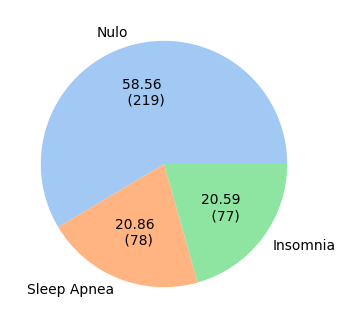

In [16]:
pizza  = data['Distúrbio do sono'].value_counts().reset_index()
plt.figure(figsize=(5,4))
plt.pie(x = pizza['count'],labels=pizza['Distúrbio do sono'],colors=sea.color_palette('pastel'),autopct=lambda x : '{:.2f} \n ({:.0f})'.format(x,(x/100)*pizza['count'].sum()) )
plt.show('Proporção de dados do atributo distúbio do sono')
plt.show()

> Existem mais dados de pessoas que não tem nenhum disturbio do sono , se faz necessrio o balanceamento dos dados

#### gender

In [17]:
genderDistubio = data.groupby(by='Gênero')['Distúrbio do sono'].value_counts().reset_index()

In [18]:
genderDistubio

,Gênero,Distúrbio do sono,count
0,Female,Nulo,82
1,Female,Sleep Apnea,67
2,Female,Insomnia,36
3,Male,Nulo,137
4,Male,Insomnia,41
5,Male,Sleep Apnea,11


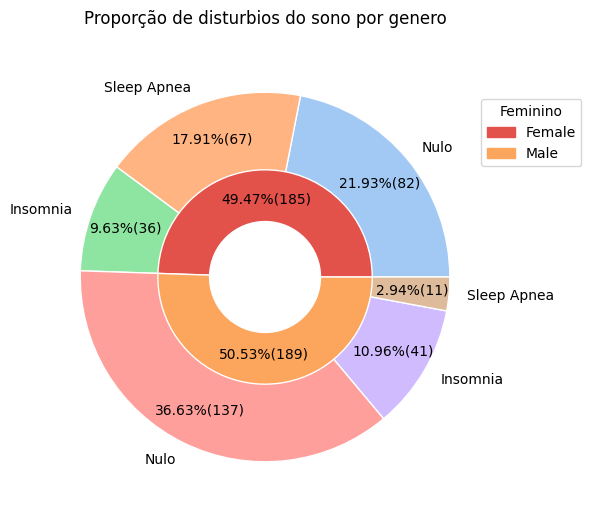

In [19]:
gender  = genderDistubio.groupby(by=['Gênero'])['count'].sum()
genderD = genderDistubio.groupby(by=['Gênero','Distúrbio do sono'])['count'].sum()

colorsG = sea.color_palette('Spectral')[0:2] 
colors  = sea.color_palette('pastel')

fig , ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)

ax.pie( x = gender , radius=0.6 ,wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.7,colors=colorsG,
        autopct=lambda x : '{:.2f}%({:.0f})'.format(x,(x/100)*gender.values.sum()))
ax.pie( x = genderDistubio['count'] , labels=genderDistubio['Distúrbio do sono'].values ,wedgeprops=dict(width=0.42, edgecolor='w'),radius=1,pctdistance=0.8,colors=colors,
        autopct=lambda x : '{:.2f}%({:.0f})'.format(x,(x/100)*genderD.values.sum()))

legends = []
for value, color in zip(genderDistubio['Gênero'].unique(), colorsG): 
       legends.append(mpatches.Patch(color=color, label=value))
ax.set_title('Proporção de disturbios do sono por genero',y=1.03)
ax.legend(title='Feminino',handles=legends,bbox_to_anchor=(1.2,0.9,0,0))
plt.show()

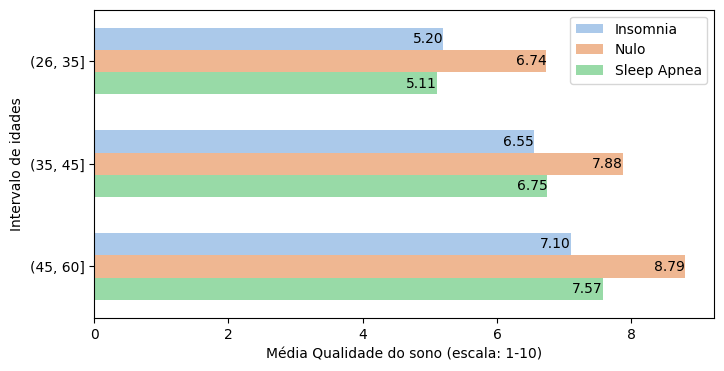

In [20]:
bar = pd.concat([data.drop(columns='Idade'),pd.cut(data['Idade'],bins=[26,35,45,60])],axis=1).groupby( by=['Idade','Distúrbio do sono'] )['Qualidade do sono (escala: 1-10)'].mean().reset_index(name='Média Qualidade do sono (escala: 1-10)')

plt.figure(figsize=(8,4))
plot = sea.barplot(y = bar['Idade'], x=bar['Média Qualidade do sono (escala: 1-10)'],hue=bar['Distúrbio do sono'] , orient='h',width=0.65,palette='pastel')

for p in plot.patches:
    if p.get_width() != 0:
        plt.annotate("%.2f" % p.get_width(), xy = (p.get_width(), p.get_y()+p.get_height()/2), xytext    = (0, 0), textcoords= 'offset points', ha = 'right', va = "center")

plt.legend(bbox_to_anchor=(1,1,0,0))
plt.ylabel('Intervalo de idades')
plt.show()

> Pessoas que não possuem nenhum disturbio na média possuem uma maior qualidade do sono

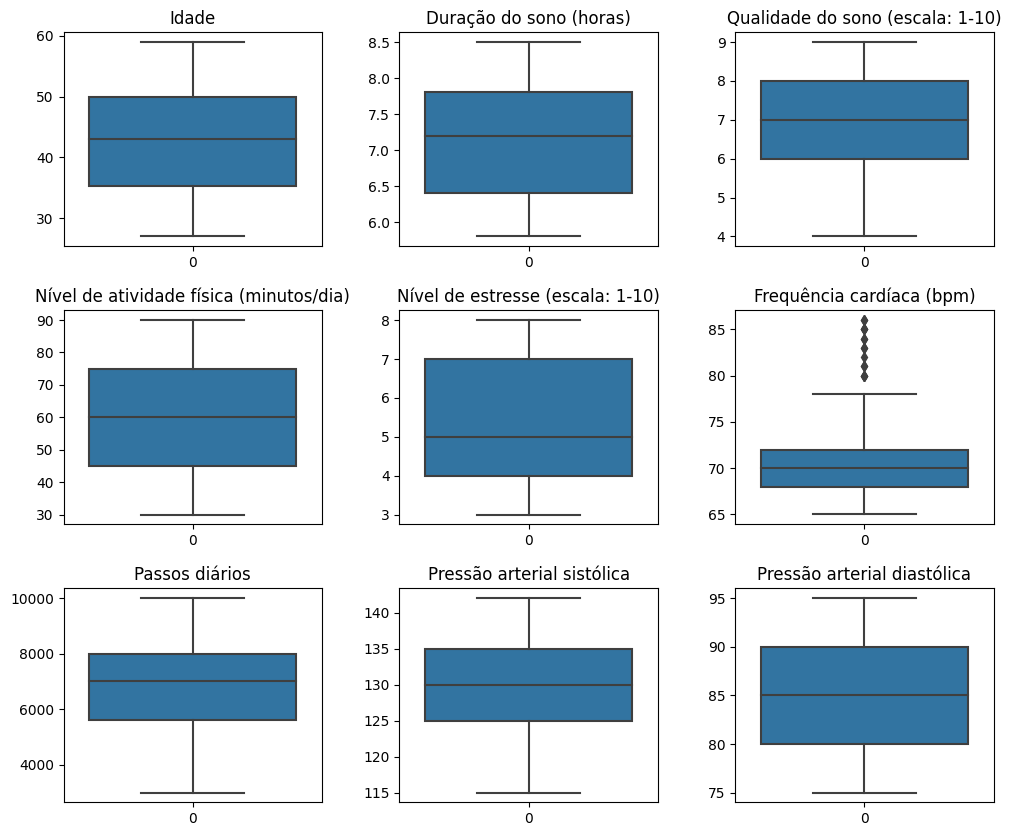

In [21]:
fig , ax = plt.subplots(3,3)
fig.set_figwidth(12)
fig.set_figheight(10)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
coluna = data.select_dtypes(include=['int64', 'float64']).columns
index = 0
for i in range(3):
    for j in range(3):
        ax[i,j].set_title(coluna[index])
        sea.boxplot(data[coluna[index]],ax=ax[i,j])
        index = index +1
plt.show()          

In [22]:
data['Ocupação'].value_counts()

Ocupação
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

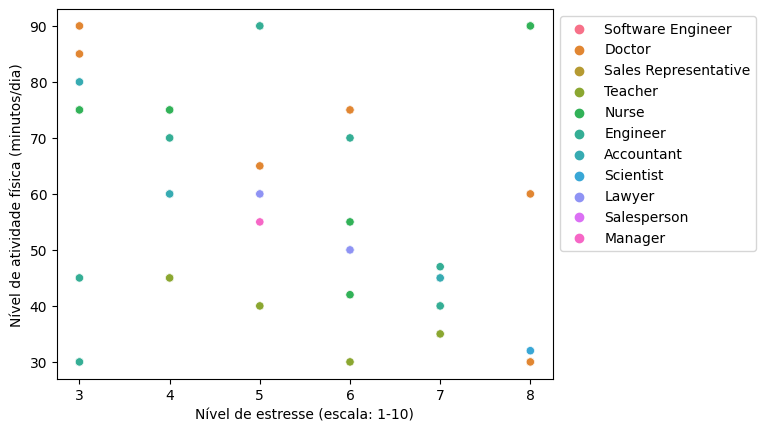

In [23]:
select = data[['Ocupação','Nível de atividade física (minutos/dia)','Nível de estresse (escala: 1-10)']]
sea.scatterplot(y = select['Nível de atividade física (minutos/dia)'],x = select['Nível de estresse (escala: 1-10)'],hue=select['Ocupação'])
plt.legend(bbox_to_anchor=(1,1,0,0))
plt.show()

In [24]:
plt.figure(figsize=(12,15))
sea.pairplot(data.drop(columns='Idade'),hue='Distúrbio do sono')
plt.show()

&nbsp;

# Classificação

In [ ]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics       import *
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,KFold,cross_val_score,cross_val_predict

from sklearn.tree        import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neighbors   import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Preprocessamento

In [ ]:
classGender   = LabelBinarizer()
classOcupacao = LabelEncoder()
classDisturbio = LabelEncoder()

In [ ]:
data['Gênero']   = classGender.fit_transform(data['Gênero'])
data['Ocupação'] = classOcupacao.fit_transform(data['Ocupação'])
data['Distúrbio do sono'] = classDisturbio.fit_transform(data['Distúrbio do sono'])

In [ ]:
classDisturbio.classes_

array(['Insomnia', 'Nulo', 'Sleep Apnea'], dtype=object)

In [ ]:
data = pd.get_dummies(data,columns=['Ocupação','Categoria de IMC','Gênero'],dtype=int)

In [ ]:
data.corrwith(data['Distúrbio do sono'])

Idade                                      0.232000
Duração do sono (horas)                    0.177552
Qualidade do sono (escala: 1-10)           0.179592
Nível de atividade física (minutos/dia)    0.433214
Nível de estresse (escala: 1-10)          -0.036058
Frequência cardíaca (bpm)                  0.205987
Passos diários                             0.342098
Distúrbio do sono                          1.000000
Pressão arterial sistólica                 0.241786
Pressão arterial diastólica                0.310051
Ocupação_0                                -0.098753
Ocupação_1                                 0.008580
Ocupação_2                                -0.046259
Ocupação_3                                 0.010955
Ocupação_4                                -0.000215
Ocupação_5                                 0.605749
Ocupação_6                                 0.113594
Ocupação_7                                -0.417031
Ocupação_8                                 0.080324
Ocupação_9  

#### Padronização

In [ ]:
data[
    ['Pressão arterial sistólica','Pressão arterial diastólica','Duração do sono (horas)', 
    'Qualidade do sono (escala: 1-10)','Nível de atividade física (minutos/dia)',
    'Nível de estresse (escala: 1-10)','Frequência cardíaca (bpm)','Idade','Passos diários']
    ] = MinMaxScaler().fit_transform(data[['Pressão arterial sistólica','Pressão arterial diastólica','Duração do sono (horas)', 'Qualidade do sono (escala: 1-10)','Nível de atividade física (minutos/dia)','Nível de estresse (escala: 1-10)','Frequência cardíaca (bpm)','Idade','Passos diários']])

In [ ]:
data.head(4)

,Idade,Duração do sono (horas),Qualidade do sono (escala: 1-10),Nível de atividade física (minutos/dia),Nível de estresse (escala: 1-10),Frequência cardíaca (bpm),Passos diários,Distúrbio do sono,Pressão arterial sistólica,Pressão arterial diastólica,...,Ocupação_7,Ocupação_8,Ocupação_9,Ocupação_10,Categoria de IMC_Normal,Categoria de IMC_Normal Weight,Categoria de IMC_Obese,Categoria de IMC_Overweight,Gênero_0,Gênero_1
0,0.00000,0.111111,0.4,0.2,0.6,0.571429,0.171429,1,0.407407,0.40,...,0,0,1,0,0,0,0,1,0,1
1,0.03125,0.148148,0.4,0.5,1.0,0.476190,1.000000,1,0.370370,0.25,...,0,0,0,0,1,0,0,0,0,1
2,0.03125,0.148148,0.4,0.5,1.0,0.476190,1.000000,1,0.370370,0.25,...,0,0,0,0,1,0,0,0,0,1
3,0.03125,0.037037,0.0,0.0,1.0,0.952381,0.000000,2,0.925926,0.75,...,0,0,0,0,0,0,1,0,0,1


#### Balanceamento dos dados

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
under = RandomUnderSampler(sampling_strategy={0: 77, 1:90, 2: 78},random_state=42)

In [ ]:
X = data.drop(columns=['Distúrbio do sono'])
Y = data['Distúrbio do sono']

In [ ]:
Xunder , Yunder = under.fit_resample(X,Y)

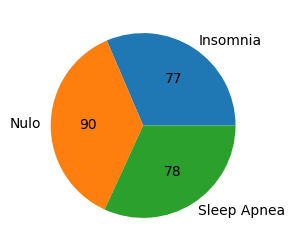

In [ ]:
pizza = Yunder.value_counts().reset_index().sort_values(by='Distúrbio do sono')
plt.figure(figsize=(5,3))
plt.pie(labels=classDisturbio.classes_, x = pizza['count'],autopct=lambda x:'{:.0f}'.format((x/100)*pizza['count'].sum()))
plt.show()

> Diminui a quantidade de dados dos valores Nulo de `219` para `90` 

Por que não igualou para 77 valores cada tipo de valor? Pois com Nulo:90 , Insomnia:77 , SleepApnea:80 foi onde obtive melhor resultado.   

In [ ]:
xtrain ,xtest ,ytrain ,ytest = train_test_split(Xunder.values,Yunder.values,test_size=0.25,random_state=42)

### Regressão logistica
Definindo hyperparamentor com grisearchCv estava dando erro em virtude do multiclass e das combinações não respeitar as restrinções do sklearn para esse tipo de atributo alvo

In [ ]:
logistic = LogisticRegression(max_iter=900, multi_class='multinomial')

In [ ]:
logistic.fit(xtrain,ytrain)

LogisticRegression(max_iter=900, multi_class='multinomial')

In [ ]:
predLogistic = logistic.predict(xtest)

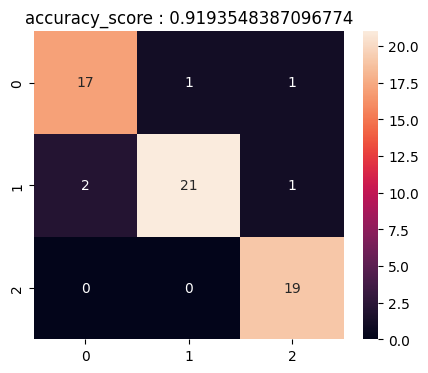

In [ ]:
plt.figure(figsize=(5,4))
sea.heatmap(confusion_matrix(ytest,predLogistic),annot=True,fmt='')
plt.title(f'accuracy_score : {accuracy_score(ytest,predLogistic)}')
plt.show()

In [ ]:
print(classification_report(ytest,predLogistic))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.95      0.88      0.91        24
           2       0.90      1.00      0.95        19

    accuracy                           0.92        62
   macro avg       0.92      0.92      0.92        62
weighted avg       0.92      0.92      0.92        62



In [ ]:
f1_score(ytest, predLogistic, average='macro')

0.9192601067887108

In [ ]:
fold = KFold(n_splits=5,shuffle=True,random_state=25)
for i , (train_index, test_index) in enumerate(fold.split(X)):
   
    xtrainf , xtestf = X.iloc[train_index], X.iloc[test_index] 
    ytrainf , ytestf = Y.iloc[train_index], Y.iloc[test_index]
   
    print(f'Fold {i}')
    pred = logistic.fit(xtrainf,ytrainf).predict(xtestf)
    print('accuracy_score   : ',accuracy_score(ytestf,pred))

Fold 0
accuracy_score   :  0.8933333333333333
Fold 1
accuracy_score   :  0.9066666666666666
Fold 2
accuracy_score   :  0.8666666666666667
Fold 3
accuracy_score   :  0.8933333333333333
Fold 4
accuracy_score   :  0.8918918918918919


In [ ]:
fold = KFold(n_splits=5)

print(cross_val_score(logistic,X,Y,cv=fold))
print('Media :',cross_val_score(logistic,X,Y,cv=fold).mean())

[0.85333333 0.84       0.90666667 0.88       0.54054054]
Media : 0.8041081081081082


&nbsp;

### KNN

In [ ]:
params = {
    'n_neighbors': [5,7,10,15],
    'weights': ['uniform', 'distance'] ,
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] ,
    'leaf_size': [30,50,70],
    'p':[2,3,5,8]
    }

gridKnn = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid= params,
    scoring='accuracy',
)

In [ ]:
gridKnn.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 50, 70],
                         'n_neighbors': [5, 7, 10, 15], 'p': [2, 3, 5, 8],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print('Melhor estimador : \n',gridKnn.best_estimator_)
print()
print("Melhor parametro :\n",gridKnn.best_params_)

Melhor estimador : 
 KNeighborsClassifier(n_neighbors=7, p=3)

Melhor parametro :
 {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'p': 3, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, p=3)

In [ ]:
knn.fit(xtrain,ytrain)
predKnn = knn.predict(xtest)

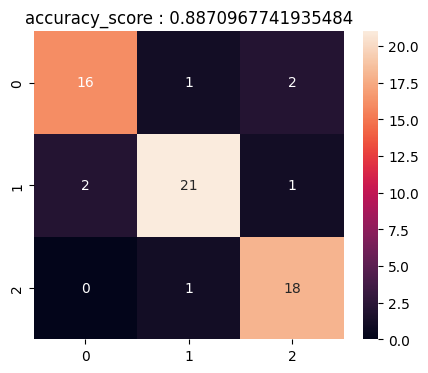

In [ ]:
plt.figure(figsize=(5,4))
sea.heatmap(confusion_matrix(ytest,predKnn),annot=True,fmt='')
plt.title(f'accuracy_score : {accuracy_score(ytest,predKnn)}')
plt.show()

In [ ]:
print(classification_report(ytest,predKnn))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.91      0.88      0.89        24
           2       0.86      0.95      0.90        19

    accuracy                           0.89        62
   macro avg       0.89      0.89      0.89        62
weighted avg       0.89      0.89      0.89        62



In [ ]:
f1_score(ytest, predKnn, average='macro')

0.8861606287138203

In [ ]:
fold = KFold(n_splits=10)
print(cross_val_score(knn,X,Y,cv=fold))
print('Média : ',cross_val_score(knn,X,Y,cv=fold).mean())

[0.78947368 0.89473684 0.76315789 0.92105263 0.86486486 0.89189189
 0.89189189 0.81081081 0.81081081 0.91891892]
Média :  0.8557610241820768


&nbsp;

### Bernouf1_score(ytest, predLogistic, average='macro')fold = KFold(n_splits=10,shuffle=True,random_state=25)fold = KFold(n_splits=10,shuffle=True,random_state=25)lli

In [ ]:
params = {
    'alpha':[1,2,3,4,5],
    'fit_prior': [True],
}
gridBernoulli = GridSearchCV(
    estimator = BernoulliNB(),
    param_grid= params,
    scoring   = 'accuracy'
)

In [ ]:
gridBernoulli.fit(xtrain,ytrain)

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5], 'fit_prior': [True]},
             scoring='accuracy')

In [ ]:
print('Melhor estimador : \n',gridBernoulli.best_estimator_)
print()
print("Melhor parametro :\n",gridBernoulli.best_params_)

Melhor estimador : 
 BernoulliNB(alpha=2)

Melhor parametro :
 {'alpha': 2, 'fit_prior': True}


In [ ]:
gridBernoulli.best_score_

0.8253753753753752

In [ ]:
bernoulli = BernoulliNB(alpha=2)

In [ ]:
bernoulli.fit(xtrain,ytrain)
predBernouli = bernoulli.predict(xtest)

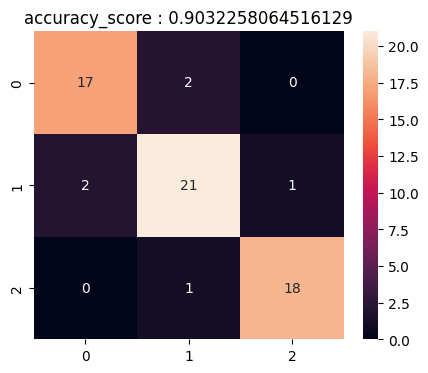

In [ ]:
plt.figure(figsize=(5,4))
sea.heatmap(confusion_matrix(ytest,predBernouli),annot=True,fmt='')
plt.title(f'accuracy_score : {accuracy_score(ytest,predBernouli)}')
plt.show()

In [ ]:
f1_score(ytest, predBernouli, average='macro')

0.9057017543859649

In [ ]:
fold = KFold(n_splits=10)
print(cross_val_score(bernoulli,X,Y,cv=fold))
print('Media :',cross_val_score(bernoulli,X,Y,cv=fold).mean())

[0.81578947 0.89473684 0.81578947 0.92105263 0.86486486 0.86486486
 0.89189189 0.78378378 0.78378378 0.91891892]
Media : 0.855547652916074
